In [1]:
import numpy as np
import cv2
import json
from matplotlib import pyplot as plt


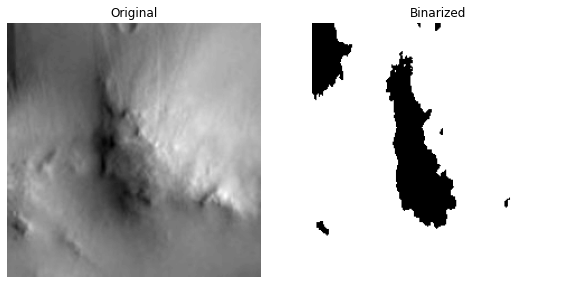

In [7]:
def read_this(image_file, gray_scale=False):
    image_src = cv2.imread(image_file)
    if gray_scale:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2GRAY)
    else:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2RGB)
    return image_src


def convert_binary(image_matrix, thresh_val):
    white = 255
    black = 0
    
    initial_conv = np.where((image_matrix <= thresh_val), image_matrix, white)
    final_conv = np.where((initial_conv > thresh_val), initial_conv, black)
    
    return final_conv


def binarize_this(image_file, thresh_val=127, with_plot=False, gray_scale=False):
    image_src = read_this(image_file=image_file, gray_scale=gray_scale)
    
    if not gray_scale:
        cmap_val = None
        r_img, g_img, b_img = image_src[:, :, 0], image_src[:, :, 1], image_src[:, :, 2]
        
        r_b = convert_binary(image_matrix=r_img, thresh_val=thresh_val)
        g_b = convert_binary(image_matrix=g_img, thresh_val=thresh_val)
        b_b = convert_binary(image_matrix=b_img, thresh_val=thresh_val)
        
        image_b = np.dstack(tup=(r_b, g_b, b_b))
    else:
        cmap_val = 'gray'
        image_b = convert_binary(image_matrix=image_src, thresh_val=thresh_val)
    
    if with_plot:
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
        
        ax1.axis("off")
        ax1.title.set_text('Original')
        
        ax2.axis("off")
        ax2.title.set_text("Binarized")
        
        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_b, cmap=cmap_val)
        return image_b
    return image_b
x=binarize_this(image_file='../hirise-map-proj-v3/map-proj-v3/ESP_011289_1950_RED-0076-r180.jpg', with_plot=True, gray_scale=True)





In [10]:
from ..recofmars.pathfinder import *

ImportError: attempted relative import with no known parent package